In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from pandas import DataFrame
from pmdarima import auto_arima
from pandas.plotting import autocorrelation_plot


Una serie de tiempo MA (media móvil) es un modelo que se utiliza para analizar los patrones de los datos de una serie de tiempo. El modelo MA se utiliza para estimar la media de la serie de tiempo en un momento determinado, utilizando una media móvil de un orden determinado. Se representa por MA(q), donde q es el orden del modelo. El modelo MA(q) se define de la siguiente manera:

$$X_T =   \epsilon_t + \theta_0 +\theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + \theta_q 
\epsilon_{t-q}$$

con   $\epsilon_t$ ruido blanco. En delante para la construcción de las series se usará un caso especial de ruido blanco llamado ruido blanco   gaussiano definido como $W_t \sim N(0, \sigma^2)$

de forma general

$$ X_T = \theta_0 + \epsilon_t + \sum_{i=1}^q \theta_i \epsilon_{t-i} $$

o también en desviaciones a las medias como 

$$ X_t =  \epsilon_t + \sum_{i=1}^q \theta_i \epsilon_{t-i} $$


MA(1)
$$X_t = \theta_0 + \epsilon_t + \theta_1 \epsilon_{t-1} $$


In [5]:
n=1000
wn=np.random.randn(n)
ma1=np.zeros(n)
theta1=0.5

In [6]:
for i in range(0,n):
    ma1[i]=wn[i]-theta1*wn[i-1]

Invertible


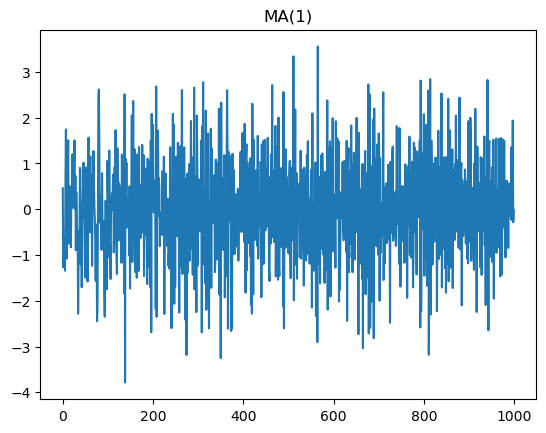

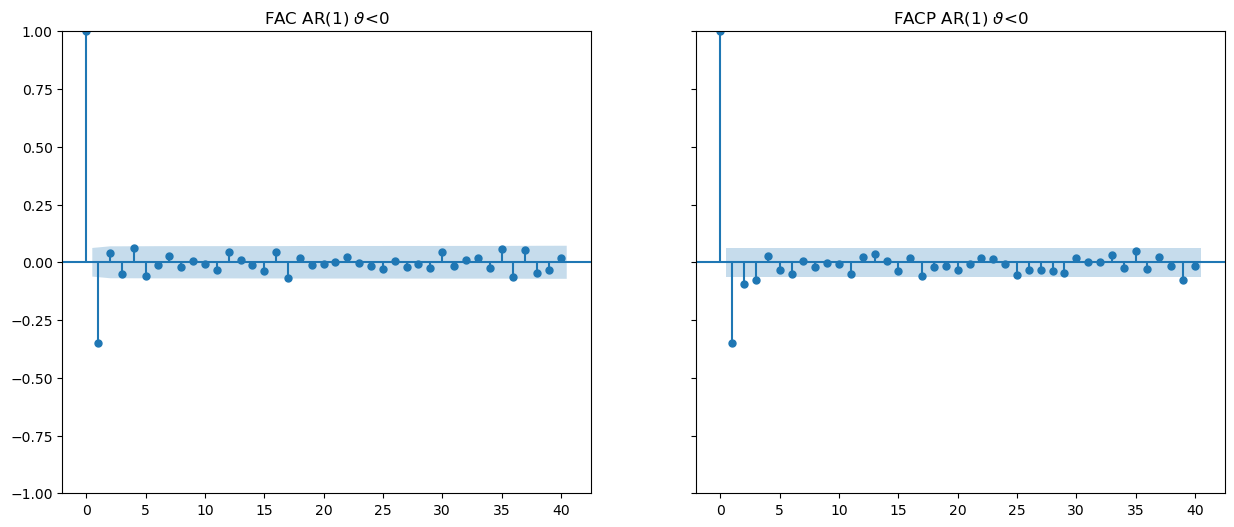

In [8]:

n=100
theta0=0
theta1=-0.5
#Inicializar matriz ma1 con ceros
am1=np.zeros(n)

#Generación de ruido blanco gaussiano N(0,1)
wn=np.random.randn(n)

#Comprobación si es invertible   por el valor de Theta1
if abs(theta1)<1:
    print("Invertible")
else:
    print("No Invertible")

#Condición para el título  del correlograma 
if theta1>0:
    thetachar=">0"
else:
    thetachar="<0"
#Creacion serie
for i in range(1,n):
    ma1[i]=wn[i]-theta1*wn[i-1]
    
#Cálculo Esperanza del proceso
#mu=phi0/(1-phi1)
#Graficas    
plt.plot(ma1)
plt.title('MA(1)')

#Correlacion total y parcial con márgenes al 95%
fig, ax = plt.subplots(1,2, sharex=True,sharey=True,figsize=(15, 6))

fig=sm.graphics.tsa.plot_acf(ma1, lags=40, ax=ax[0],title=r'FAC AR(1) $\vartheta${}'.format(thetachar))
fig=sm.graphics.tsa.plot_pacf(ma1,lags=40, ax=ax[1],title=r'FACP AR(1) $\vartheta${}'.format(thetachar))

A la inversa que en AR(1) la autocorrelacion total muestra el número de retardos y la parcial decae geométricamenet a 0

Text(0.5, 1.0, 'MA(1)')

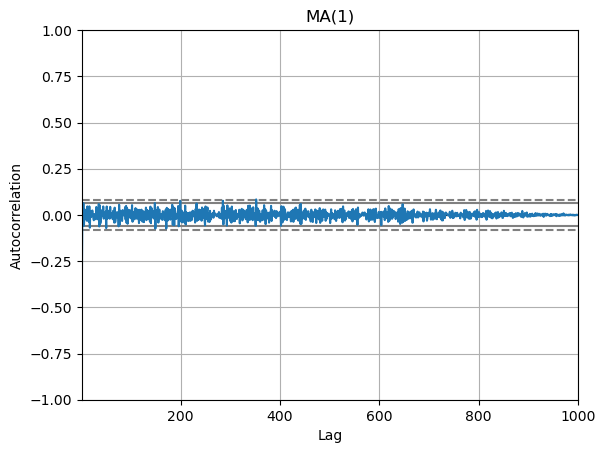

In [9]:
#Otra implementación del correlograma para ver tendencia al aumentar retardos
#Margenes de confianza 95 y 99%
autocorrelation_plot(ma1)
plt.title('MA(1)')

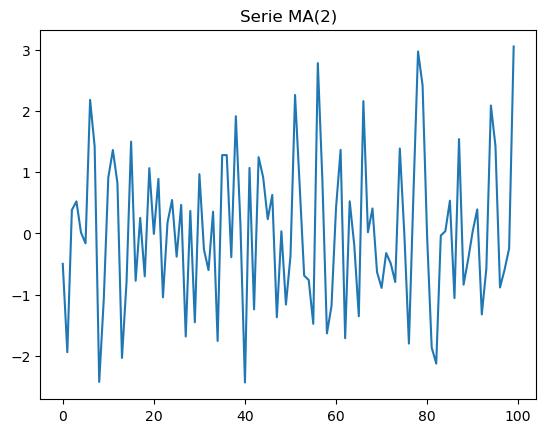

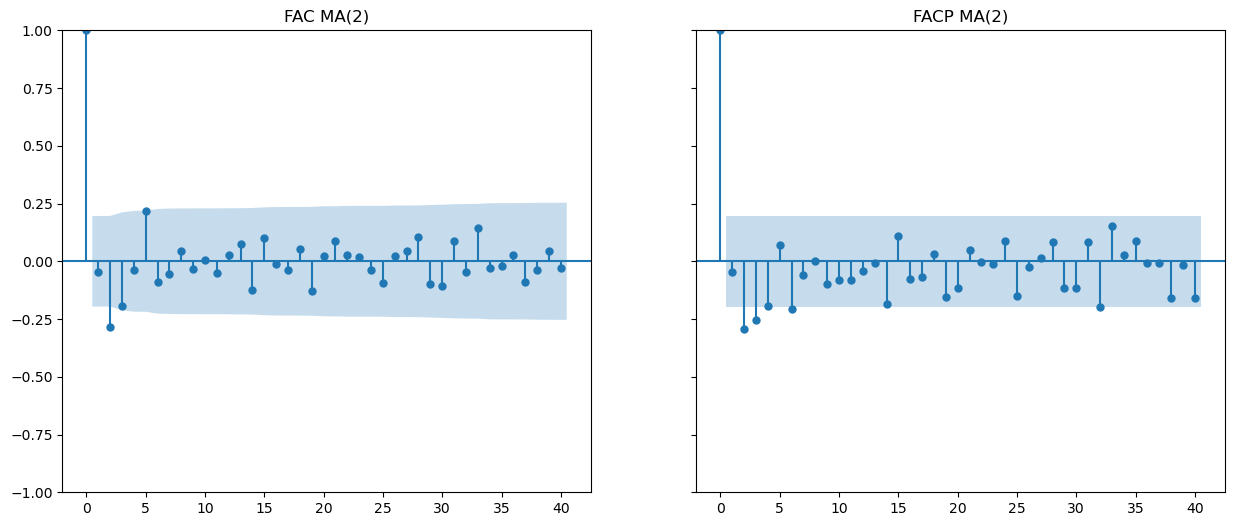

In [10]:
#MA(2)
n=100
theta0=0
theta1=0.5
theta2=0.8
am2=np.zeros(n)
for i in range(0,n):
    am2[i]=theta0+wn[i]-theta1*wn[i-1]-theta2*wn[i-2]
plt.plot(am2)
plt.title('Serie MA(2)')
fig, ax = plt.subplots(1,2, sharex=True,sharey=True,figsize=(15, 6))                                                           
fig=sm.graphics.tsa.plot_acf(am2, lags=40, ax=ax[0],title='FAC MA(2)')
fig=sm.graphics.tsa.plot_pacf(am2,lags=40, ax=ax[1],title='FACP MA(2)')    

/home/python/anaconda3/envs/arima/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


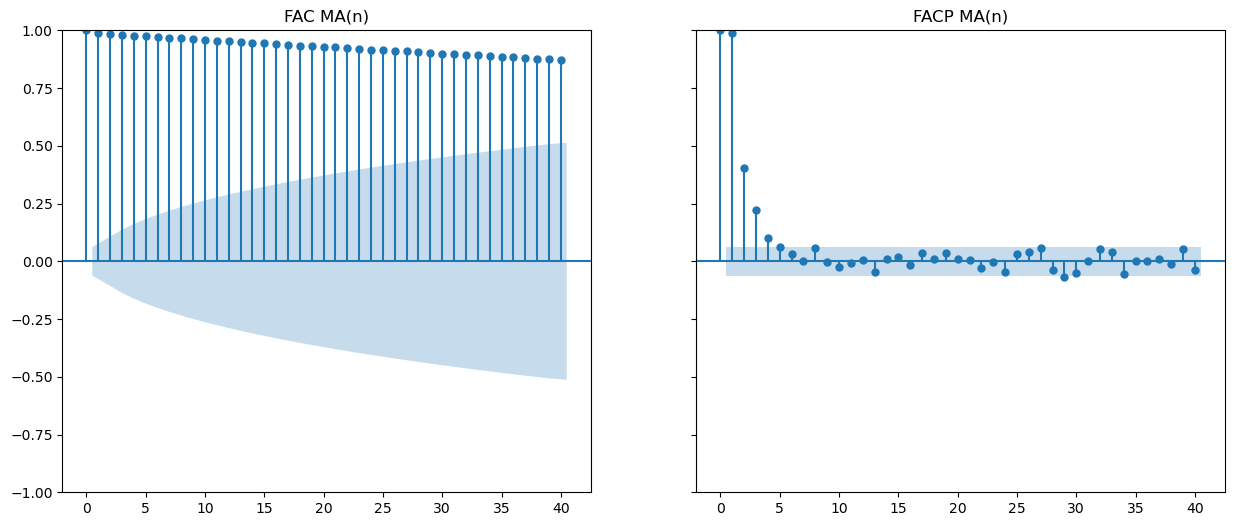

In [15]:
#MA(n)
n=1000
wn=np.random.randn(n)
theta=np.random.uniform(-1,1,n)
amn=np.zeros(n)
for i in range(0,n):
    amn[i]=wn[i]-np.sum(wn[:i]*theta[:i])
fig, ax = plt.subplots(1,2, sharex=True,sharey=True,figsize=(15, 6))
fig=sm.graphics.tsa.plot_acf(amn, lags=40, ax=ax[0],title='FAC MA(n)')
fig=sm.graphics.tsa.plot_pacf(amn,lags=40, ax=ax[1],title='FACP MA(n)')    

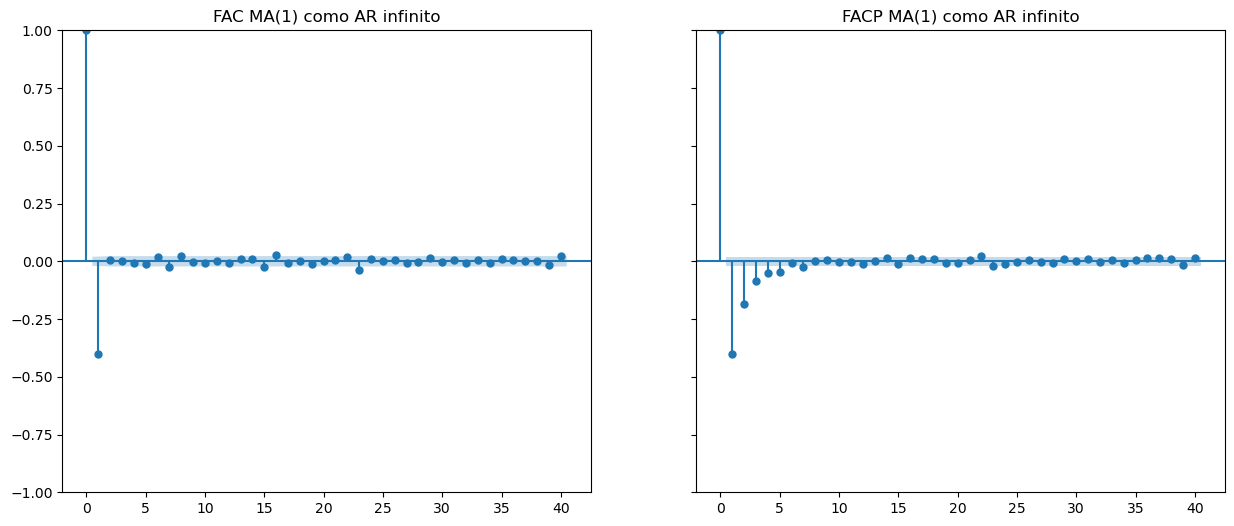

In [16]:
#MA(1)Como proceso AR infinito

n=10000
wn=np.random.randn(n)
theta1=0.5
arrtheta=np.zeros(n)
ma1=np.zeros(n)
for i in range (0,n):
    arrtheta[i]= theta1**i
#ma1[0]=wn[0]
for i in range(1,n):
    ma1[i]=wn[i]-np.sum((ma1[:i+1][::-1])*arrtheta[:i+1])
    

fig, ax = plt.subplots(1,2, sharex=True,sharey=True,figsize=(15, 6))
fig=sm.graphics.tsa.plot_acf(ma1, lags=40, ax=ax[0],title='FAC MA(1) como AR infinito')
fig=sm.graphics.tsa.plot_pacf(ma1,lags=40, ax=ax[1],title='FACP MA(1) como AR infinito')